In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns   
import math
import time
from sklearn.model_selection import train_test_split
import random

In [2]:
pat = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2692,2693,15736274,Prokhorova,751,France,Male,31,8,0.00,2,0,0,17550.49,0
1988,1989,15657107,Angelo,563,Spain,Female,46,8,106171.68,1,1,0,163145.50,1
246,247,15685500,Glazkov,772,Germany,Male,26,7,152400.51,2,1,0,79414.00,0
4435,4436,15648967,Ch'en,698,Germany,Female,64,1,169362.43,1,1,0,84760.32,1
6286,6287,15805884,Archer,637,France,Female,41,9,0.00,2,1,0,145477.36,0


In [5]:
pat['only_1'] = 1

In [6]:
pat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
pat['france'] = pat['Geography'] == 'France'
pat['spain'] = pat['Geography'] == 'Spain' 
pat['germany'] = pat['Geography'] == 'Germany'
pat['france'] = pat['france'].astype('int')
pat['spain'] = pat['spain'].astype('int')
pat['germany'] = pat['germany'].astype('int')
pat['gender'] = pat['Gender'] != "Female"
pat['gender'] = pat['gender'].astype('int')

In [8]:
pat.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'only_1', 'france',
       'spain', 'germany', 'gender'],
      dtype='object')

In [9]:
pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]]

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,0,1,1


In [10]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,only_1,france,spain,germany,gender
3194,3195,15673539,Napolitani,690,France,Female,26,3,118097.87,1,1,0,61257.83,0,1,1,0,0,0
7931,7932,15751227,Ebelegbulam,807,France,Male,47,1,95120.59,1,0,0,127875.10,0,1,1,0,0,1
9048,9049,15640855,T'ien,729,Germany,Male,40,5,113574.61,2,1,0,103396.08,0,1,0,0,1,1
4457,4458,15743617,Chesnokova,713,Germany,Male,47,1,95994.98,1,1,0,197529.23,0,1,0,0,1,1
2576,2577,15673529,Lombardo,645,Spain,Male,36,4,59893.85,2,1,0,43999.64,0,1,0,1,0,1


In [11]:
x_train, x_test, y_train, y_test = train_test_split(pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]], pat['Exited'], test_size=0.25, random_state=0)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2967 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7500 non-null   int64  
 1   gender           7500 non-null   int64  
 2   Age              7500 non-null   int64  
 3   Tenure           7500 non-null   int64  
 4   Balance          7500 non-null   float64
 5   NumOfProducts    7500 non-null   int64  
 6   HasCrCard        7500 non-null   int64  
 7   IsActiveMember   7500 non-null   int64  
 8   EstimatedSalary  7500 non-null   float64
 9   france           7500 non-null   int64  
 10  spain            7500 non-null   int64  
 11  germany          7500 non-null   int64  
 12  only_1           7500 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 820.3 KB


In [13]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,650.463867,0.541733,38.840000,4.974400,75661.289748,1.535333,0.707067,0.516933,100169.176911,0.507733,0.248267,0.244000,1.0
std,97.169199,0.498289,10.481704,2.889462,62651.999955,0.577809,0.455138,0.499746,57498.717199,0.499974,0.432036,0.429521,0.0
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,1.0
25%,583.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000,0.000000,0.000000,1.0
50%,652.000000,1.000000,37.000000,5.000000,96318.795000,1.000000,1.000000,1.000000,100067.820000,1.000000,0.000000,0.000000,1.0
75%,719.000000,1.000000,44.000000,7.000000,127311.990000,2.000000,1.000000,1.000000,149600.350000,1.000000,0.000000,0.000000,1.0
max,850.000000,1.000000,85.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.0


In [14]:
# Normalise and store coeficients in dict
norm_dict_m = {}
norm_dict_s = {}

def normalise(df, cols):
    for col in cols:
        norm_dict_m[col] = df[col].mean()
        norm_dict_s[col] = df[col].std()
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

def normalise_test(df, cols):
    for col in cols:
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

In [15]:
normalise(x_train, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [16]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7.500000e+03,7500.000000,7.500000e+03,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.0
mean,-5.191699e-16,0.541733,-3.241259e-16,-4.831691e-17,7.484383e-17,1.535333,0.707067,0.516933,8.573882e-17,0.507733,0.248267,0.244000,1.0
std,1.000000e+00,0.498289,1.000000e+00,1.000000e+00,1.000000e+00,0.577809,0.455138,0.499746,1.000000e+00,0.499974,0.432036,0.429521,0.0
min,-3.092172e+00,0.000000,-1.988226e+00,-1.721566e+00,-1.207644e+00,1.000000,0.000000,0.000000,-1.741910e+00,0.000000,0.000000,0.000000,1.0
25%,-6.942927e-01,0.000000,-6.525657e-01,-1.029396e+00,-1.207644e+00,1.000000,0.000000,0.000000,-8.473678e-01,0.000000,0.000000,0.000000,1.0
50%,1.580885e-02,1.000000,-1.755440e-01,8.859781e-03,3.297182e-01,1.000000,1.000000,1.000000,-1.762768e-03,1.000000,0.000000,0.000000,1.0
75%,7.053278e-01,1.000000,4.922864e-01,7.010301e-01,8.244062e-01,2.000000,1.000000,1.000000,8.596918e-01,1.000000,0.000000,0.000000,1.0
max,2.053492e+00,1.000000,4.403864e+00,1.739286e+00,2.597304e+00,4.000000,1.000000,1.000000,1.736096e+00,1.000000,1.000000,1.000000,1.0


In [17]:
# y_train = y_train + 1
y_train

2967    1
700     0
3481    0
1621    1
800     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7500, dtype: int64

In [18]:
# Very Simple Approach, 1 input layer, 1 hidden layer, 1 output layer
# Neurons per layer = will adjust according to computational power

In [19]:
# activation function, we will use the relU function, f(x) = max(0, x)

In [20]:
# def activation_function_relu(x):
#     return np.vectorize(lambda x3: max(0,x3))(x)

def activation_function_sigm(x):
    return np.vectorize(lambda x3: 1 / (1 + math.e ** -(x3)))(x)

In [21]:
x = np.array([1, 2, 3, 4, -1, -3])

In [22]:
np.vectorize(lambda x3: max(0,x3))(x)

array([1, 2, 3, 4, 0, 0])

In [23]:
def evaluate(weights, inputs):
    inputs = np.array(inputs).reshape(len(inputs), 1)
    return np.matmul(weights, inputs)
def apply_activation_func(inputs):
    return activation_function_sigm(inputs)

In [24]:
# weights matrix = [features x neurons] for each layer
# incorporate the bias term in weights as an extra column and add an extra feature which always resolves to 1 in the data

In [25]:
# Use backpropogation(glorified GD) to find the right params and we end up with a classifier
# Use SGD

[[ 0.37701297 -0.30960654 -0.21982173 -0.5770083   0.35014055]]
0
1
2
3
4
5
6
7
8
9
[[ 0.39983363  0.46819613 -0.90849344 -0.26099347 -2.53338761 -6.71557117
   0.19574104  0.78831641  0.08326296 -0.00753116  0.79210209  4.62494016
   5.53474092]
 [ 0.04176203  1.5705811  -2.78378582  0.22089649 -3.12586469 -1.34624991
   0.40109771 -1.6827842  -0.05970091  0.20112739  0.4310561   0.49086272
   0.61779421]
 [ 0.01746113  1.2590022   0.61870179 -0.09510544 -0.90663865 -2.1090528
   0.12100585  6.53116525 -0.0216537  -1.00378009 -0.63716179  0.12727019
  -1.71930348]
 [ 0.41145358  0.32536947 -4.50753781  0.25070563  0.9425931  -1.18824726
   0.03234854 -2.73309367 -0.13455925  0.86101215  0.42491675  1.12530741
   2.50636395]]


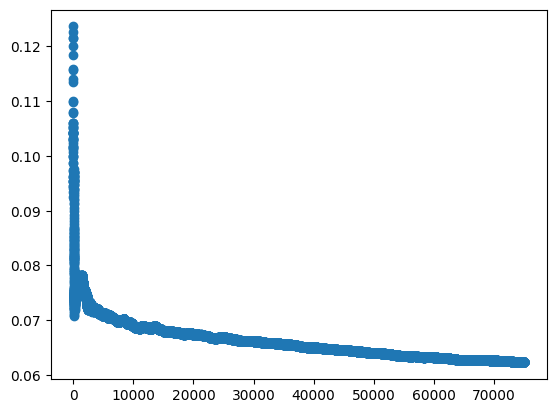

In [42]:
weights_h1= np.random.rand(4, 13) * math.sqrt(2.0 / 13)# 12 features + 1 bias term and 4 neurons
equalrand = np.vectorize(lambda x: x * random.choice([+1, -1]))
weights_h1 = equalrand(weights_h1)
# print(weights_h1)   
weights_o = np.random.rand(1, 5) * math.sqrt(2.0 / 5) * random.choice([+1, -1]) # 4 neuron output into 1 + 1 bias
weights_o = equalrand(weights_o)
print(weights_o)

# weights_h1= np.zeros((4, 13))
# weights_o = np.zeros((1, 5))

def train_rowwise(row, weights):
    outputs = evaluate(weights, row)
    return apply_activation_func(outputs)

allerrs = []
cumallerrs = []
sumall = 0
alpha = 0.1
batch_size = 1
# backpropf = np.vectorize(lambda x: 0 if x <= 0 else 1)
backpropf = np.vectorize(lambda x: x * (1 - x))
for i in range(10):
    print(i)
    lst = list(zip(x_train.iterrows(), y_train.items()))
    random.shuffle(lst)
    bs = 0
    k = 0
    outputs_agg = np.zeros((1, 5))
    output2_agg = 0.0
    y_row_agg = 0.0
    x_row_agg = np.zeros((13,))
    for x_row, y_row in lst:
        bs +=1
        k += 1
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        outputs_agg += outputs
        output2 = train_rowwise(outputs, weights_o)
        output2_agg += output2
        y_row_agg += y_row[1]
        x_row_agg += np.array(x_row[1])
         # Now calculate backprop vals
        # Whereever outputs == 0 gradient is 0 in that direction else 1
        # for relu function

        err = (y_row[1] - output2)**2 / 2
        # print(err)
        allerrs.append(err)
        sumall += err
        cumallerrs.append(sumall / len(allerrs))

        if k != len(lst)-1 and bs != batch_size:
            continue
        
        outputs_agg /= bs
        # print(outputs_agg)
        x_row_agg /= bs
        # print(x_row_agg)
        output2_agg /= bs
        y_row_agg /= bs
        bs = 0
        
        # adjust weights based on alpha and this

        backprop_c = output2_agg - y_row_agg

        layer_prop_c = backprop_c * backpropf(output2_agg)
        
        error_grad_op = layer_prop_c * outputs_agg

        # print(error_grad_op)
        
        # Now calculate error term for hidden layer

        backprop_c = backprop_c * weights_o

        layer_prop_h_c = backprop_c * backpropf(outputs_agg)

        # print(layer_prop_h_c)

        n_weights_h1 = np.zeros((4, 13))
        i = 0
        for err_n in n_weights_h1:
            n_weights_h1[i] = layer_prop_h_c[0][i] * x_row_agg 
            i+=1

        weights_o -= alpha * error_grad_op
        weights_h1 -= alpha * n_weights_h1

        outputs_agg = np.zeros((1, 5))
        output2_agg = 0.0
        y_row_agg = 0.0
        x_row_agg = np.zeros((13,))

print(weights_h1)

plt.scatter([i for i in range(len(cumallerrs))], cumallerrs)

In [35]:
y_train

2967    1
700     0
3481    0
1621    1
800     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7500, dtype: int64

In [36]:
# y_test = y_test + 1
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
8764    0
4359    0
2041    0
1108    0
3332    0
Name: Exited, Length: 2500, dtype: int64

In [37]:
normalise_test(x_test, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [38]:
x_test.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.0
mean,-6.694109,0.557600,-3.702526,-1.703169,-1.207643,1.514800,0.700800,0.509600,-1.742112,0.48240,0.246000,0.271600,1.0
std,0.010073,0.496771,0.095611,0.347087,0.000016,0.592893,0.457999,0.500008,0.000017,0.49979,0.430765,0.444874,0.0
min,-6.724370,0.000000,-3.895190,-2.317375,-1.207663,1.000000,0.000000,0.000000,-1.742142,0.00000,0.000000,0.000000,1.0
25%,-6.700964,0.000000,-3.767762,-1.958050,-1.207663,1.000000,0.000000,0.000000,-1.742127,0.00000,0.000000,0.000000,1.0
50%,-6.694027,1.000000,-3.717701,-1.718500,-1.207638,1.000000,1.000000,1.000000,-1.742111,0.00000,0.000000,0.000000,1.0
75%,-6.687407,1.000000,-3.658538,-1.359175,-1.207630,2.000000,1.000000,1.000000,-1.742097,1.00000,0.000000,1.000000,1.0
max,-6.673003,1.000000,-3.221643,-1.119625,-1.207599,4.000000,1.000000,1.000000,-1.742081,1.00000,1.000000,1.000000,1.0


In [43]:
ypred = []
yprednorm = []
for x_row in x_test.iterrows():
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        output2 = train_rowwise(outputs, weights_o)
        ypred.append(output2[0, 0])
        yprednorm.append(0 if output2 < 0.5 else 1)

In [44]:
print(set(ypred))
print(set(yprednorm))

{0.20894914455062263, 0.045855000092114295, 0.027979189790787732, 0.01595110222744012, 0.03162888267305775, 0.007614707293051035, 0.029460676780093575, 0.015678250724537445, 0.02435798671660906, 0.024058211846274002, 0.2074538765345123, 0.024250372496727145, 0.03663670306839253, 0.02608876663196471, 0.021889436581179943, 0.046889948745263886, 0.21115437591209488, 0.2140632918540533, 0.025917630455250446, 0.036456266748647465, 0.21243406218447095, 0.21014037969350954, 0.20850652083030144, 0.208942551135916, 0.0262476382829924, 0.007815320672339286, 0.025357816604294956, 0.22317595302256987, 0.21467349440257558, 0.024272482462663492, 0.02514506785309228, 0.024545128844152997, 0.21002340848002637, 0.20894862096928085, 0.2141961765114218, 0.21575513470070368, 0.21539775936089361, 0.057710846241498415, 0.2094260231102965, 0.009022642814724039, 0.008953589663800502, 0.047813286378644966, 0.028563897849476723, 0.02167919256695334, 0.008303966188020049, 0.025243423089577343, 0.0263921343539124

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yprednorm)

0.7964